In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from pytorch_mlp import MLP as MLP_pytorch
import torch.nn.functional as F

In [2]:
# 定义数据转换
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 加载训练集和测试集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Files already downloaded and verified
Files already downloaded and verified
[Epoch 1, Batch 100] loss: 1.870
[Epoch 1, Batch 200] loss: 1.696
[Epoch 1, Batch 300] loss: 1.617
[Epoch 1, Batch 400] loss: 1.557
[Epoch 1, Batch 500] loss: 1.543
Accuracy of the network on the 10000 test images: 46.06%
[Epoch 2, Batch 100] loss: 1.457
[Epoch 2, Batch 200] loss: 1.460
[Epoch 2, Batch 300] loss: 1.418
[Epoch 2, Batch 400] loss: 1.411
[Epoch 2, Batch 500] loss: 1.407
Accuracy of the network on the 10000 test images: 50.28%
[Epoch 3, Batch 100] loss: 1.333
[Epoch 3, Batch 200] loss: 1.309
[Epoch 3, Batch 300] loss: 1.305
[Epoch 3, Batch 400] loss: 1.305
[Epoch 3, Batch 500] loss: 1.299
Accuracy of the network on the 10000 test images: 51.51%
[Epoch 4, Batch 100] loss: 1.210
[Epoch 4, Batch 200] loss: 1.232
[Epoch 4, Batch 300] loss: 1.217
[Epoch 4, Batch 400] loss: 1.211
[Epoch 4, Batch 500] loss: 1.196
Accuracy of the network on the 10000 test images: 53.66%
[Epoch 5, Batch 100] loss: 1.102
[Ep

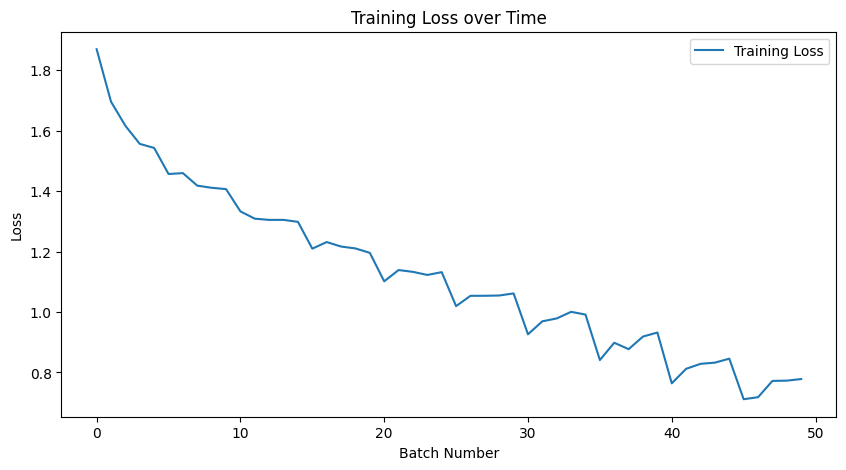

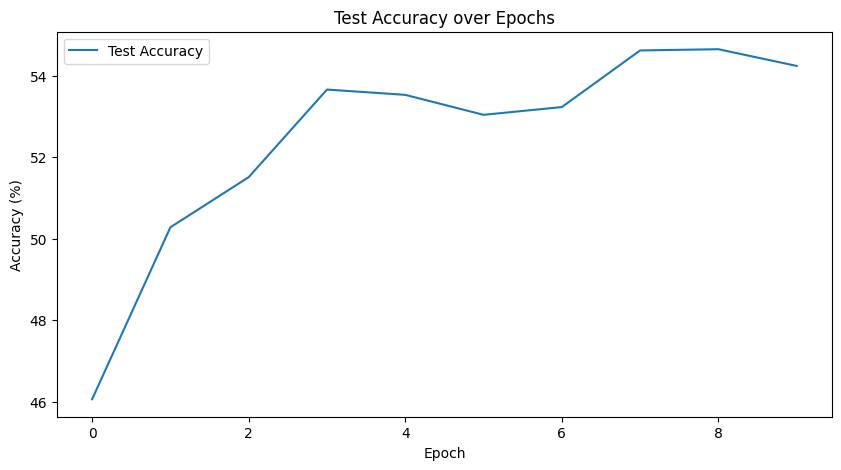

Final Test Accuracy: 54.24%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

# 定义数据转换
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 加载训练集和测试集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def train_model(net, trainloader, criterion, optimizer, epochs=10):
    train_losses = []
    test_accuracies = []
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
                train_losses.append(running_loss / 100)
                running_loss = 0.0

        # 在每个epoch结束时测试模型并记录准确率
        test_accuracy = test_model(net, testloader)
        test_accuracies.append(test_accuracy)
    return train_losses, test_accuracies

def test_model(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')
    return accuracy

class MLP(nn.Module):
    
    def __init__(self, n_inputs, n_hidden, n_classes):
        """
        Initializes multi-layer perceptron object.    
        Args:
            n_inputs: number of inputs (i.e., dimension of an input vector).
            n_hidden: list of integers, where each integer is the number of units in each linear layer
            n_classes: number of classes of the classification problem (i.e., output dimension of the network)
        """
        super(MLP, self).__init__()
        layers = []
        in_features = n_inputs
        for hidden_size in n_hidden:
            layers.append(nn.Linear(in_features, hidden_size))
            in_features = hidden_size
        layers.append(nn.Linear(in_features, n_classes))
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        """
        Predict network output from input by passing it through several layers.
        Args:
            x: input to the network
        Returns:
            out: output of the network
        """
        x = x.view(x.size(0), -1)  # 展平操作
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
        out = self.layers[-1](x)
        return out

hidden_units = [512, 256, 128]
n_inputs = 3 * 32 * 32
n_classes = 10
net = MLP(n_inputs, hidden_units, n_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


train_losses, test_accuracies = train_model(net, trainloader, criterion, optimizer, epochs=10)

# 绘制训练损失
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend()
plt.show()

# 绘制测试准确率
plt.figure(figsize=(10,5))
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.show()

print(f'Final Test Accuracy: {test_accuracies[-1]:.2f}%')